# Test simulated annealing optimization on a couple states

In [1]:
%matplotlib inline

import json

from gerrychain import Graph, Partition
from gerrychain.random import random
import geopandas
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from rba import optimization
from rba.visualization import visualize_partition_geopandas


random.seed(2023)

In [2]:
# New Hampshire - easy test case

optimization.optimize(
    graph_file="../rba/data/2010/new_hampshire_geodata_merged.json",
    communitygen_out_file="../rba/data/2010/new_hampshire_communities.json",
    vra_config_file="vra_nh.json",
    num_steps=100,
    num_districts=2,
    initial_plan_file="../rba/data/2010/new_hampshire_districts.json",
    output_dir="nh_sa",
    verbose=True
)

Loading precinct graph...done!
Loading community algorithm output...done!
Loading precinct graph...done!
Loading starting map...done!
Running Markov chain...


  0%|          | 0/100 [00:00<?, ?it/s]

Saving data from optimization...done!


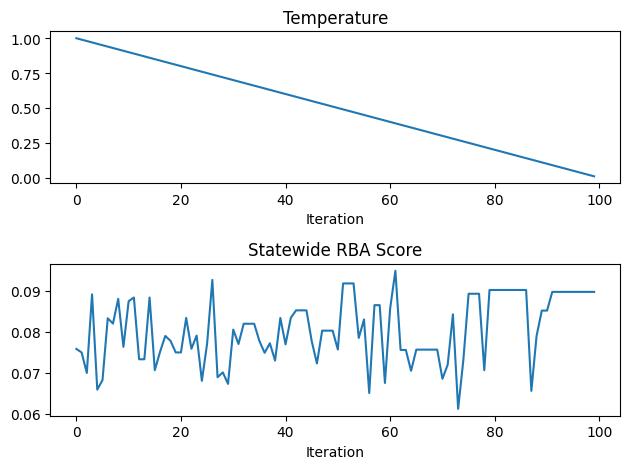

In [3]:
nh_df = pd.read_csv("nh_sa/optimization_stats.csv")

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(nh_df.index)), nh_df["temperature"])
axs[0].set_title("Temperature")
axs[0].set_xlabel("Iteration")
axs[1].plot(np.arange(len(nh_df.index)), nh_df["state_gerry_score"])
axs[1].set_title("Statewide RBA Score")
axs[1].set_xlabel("Iteration")
plt.tight_layout()

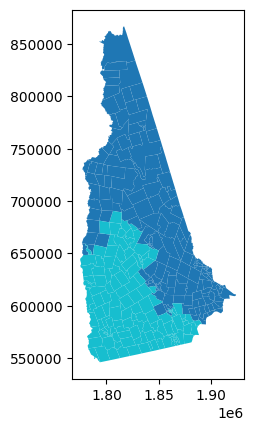

In [4]:
with open("nh_sa/Plan_0.json", "r") as f:
    best_assignment = json.load(f)

with open("../rba/data/2010/new_hampshire_geodata_merged.json", "r") as f:
    data = json.load(f)
nx_graph = nx.readwrite.json_graph.adjacency_graph(data)
graph = Graph.from_networkx(nx_graph)
del nx_graph

best_partition = Partition(graph, best_assignment)
visualize_partition_geopandas(best_partition)